In [1]:
import torch
import os
from transformer_net import TransformerNet
import dotmap
import json
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import numpy as np
from torchvision import transforms as T

In [2]:
config_path = "result/config.json"
model_path = "result/last.pth"
content_path = "doge.jpg"

In [3]:
args = dotmap.DotMap(
  json.load(open(config_path))
)

In [4]:
device = ["cpu", "cuda"][torch.cuda.is_available()]
device

'cuda'

In [5]:
args

DotMap(seed=228922, device_count=4, batch_size=16, big_size=512, image_size=256, style_size=None, dataset='val2017', lr=0.001, epochs=100, save_every_n_batches=300, weight_decay=0.01, content_weight=100000.0, content_weight_decay=0.999, content_weight_lower=100000.0, style_weight=10000000000.0, style_path_template='style/*.jpg', style_layers=['relu1_2', 'relu2_2', 'relu3_3', 'relu4_3'], content_layers=['relu2_2'], feature_layers=['relu1_2', 'relu4_3', 'relu2_2', 'relu3_3'], n_style=15, _ipython_display_=DotMap(), _repr_mimebundle_=DotMap())

In [6]:
transformer = TransformerNet(args.n_style)

In [7]:
transformer.load_state_dict(torch.load(model_path))
transformer.to(device)

TransformerNet(
  (conv1): ConvLayer(
    (reflection_pad): ReflectionPad2d((4, 4, 4, 4))
    (conv2d): Conv2d(3, 32, kernel_size=(9, 9), stride=(1, 1), bias=False)
  )
  (cin1): ConditionInstanceNorm2d(
    (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  )
  (conv2): ConvLayer(
    (reflection_pad): ReflectionPad2d((1, 1, 1, 1))
    (conv2d): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
  )
  (cin2): ConditionInstanceNorm2d(
    (norm): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  )
  (conv3): ConvLayer(
    (reflection_pad): ReflectionPad2d((1, 1, 1, 1))
    (conv2d): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), bias=False)
  )
  (cin3): ConditionInstanceNorm2d(
    (norm): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  )
  (res1): ResidualBlock(
    (conv1): ConvLayer(
      (reflection_pad): ReflectionPad2d((1, 1, 1, 1))
      (con

In [8]:
content_image = utils.load_image(
  content_path
)
content_image = T.ToTensor()(content_image)

In [9]:
content_image.dtype

torch.float32

In [10]:
transformer.train()

TransformerNet(
  (conv1): ConvLayer(
    (reflection_pad): ReflectionPad2d((4, 4, 4, 4))
    (conv2d): Conv2d(3, 32, kernel_size=(9, 9), stride=(1, 1), bias=False)
  )
  (cin1): ConditionInstanceNorm2d(
    (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  )
  (conv2): ConvLayer(
    (reflection_pad): ReflectionPad2d((1, 1, 1, 1))
    (conv2d): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
  )
  (cin2): ConditionInstanceNorm2d(
    (norm): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  )
  (conv3): ConvLayer(
    (reflection_pad): ReflectionPad2d((1, 1, 1, 1))
    (conv2d): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), bias=False)
  )
  (cin3): ConditionInstanceNorm2d(
    (norm): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  )
  (res1): ResidualBlock(
    (conv1): ConvLayer(
      (reflection_pad): ReflectionPad2d((1, 1, 1, 1))
      (con

In [11]:
result = []
test_style_idx = torch.arange(0,args.n_style,device=device)
for i in range(args.n_style):
  result.append(
    T.ToPILImage()(
      transformer(
        content_image.unsqueeze(0).to(device),
        test_style_idx[i].unsqueeze(0)
      ).squeeze(0)/255
    )
  )
  

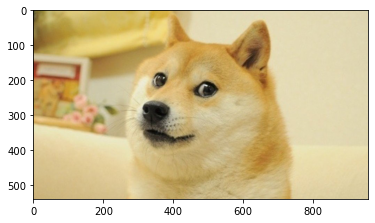

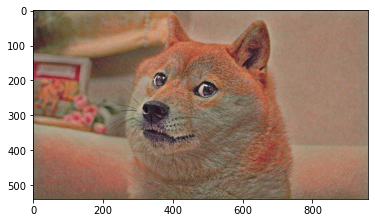

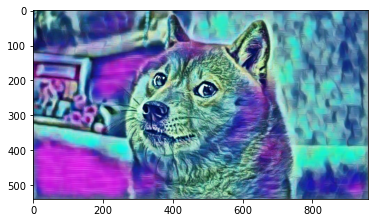

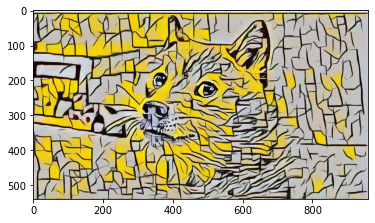

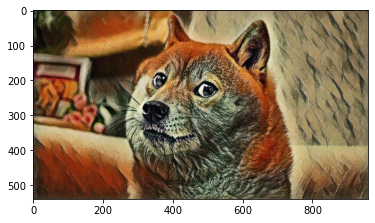

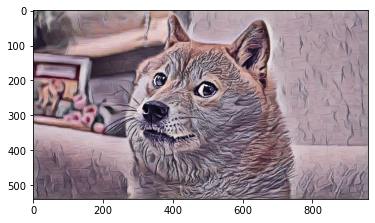

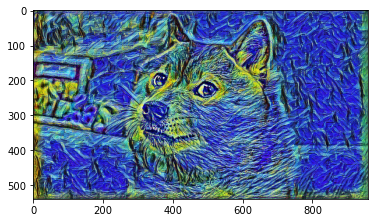

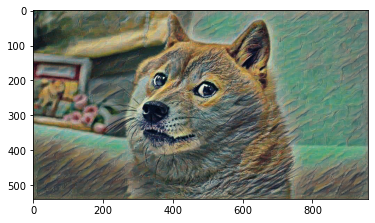

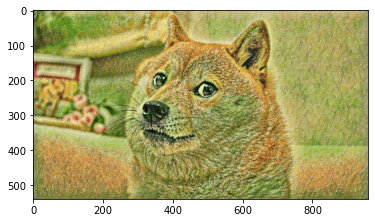

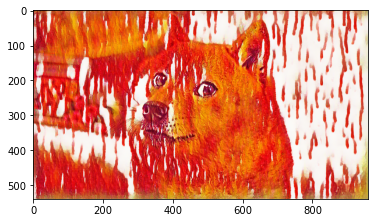

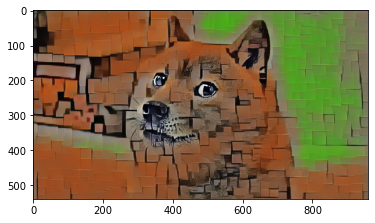

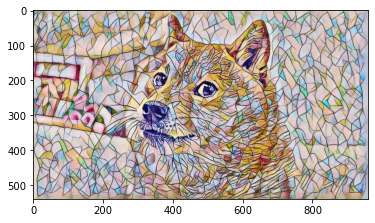

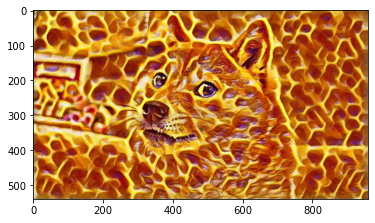

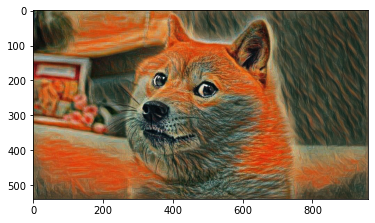

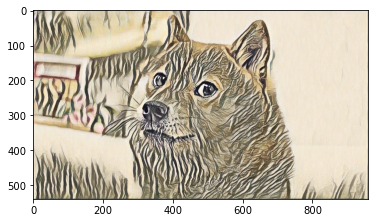

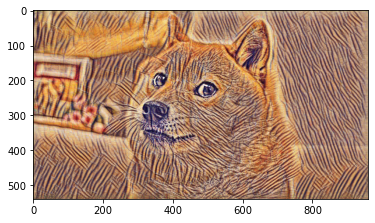

In [12]:
for im, itr in zip([T.ToPILImage()(content_image),*result], range(len(result)+1)):
  im.save(f"stylized_result/{os.path.splitext(os.path.basename(content_path))[0]}_{itr:03d}.jpg")
  plt.imshow(np.asarray(im))
  plt.show()